# Exploración de los datos para su limpieza

- 1. Carga del dataset e inicialización de la clase DataAnalyzer
- 2. Análisis exploratorio de datos para la limpieza
- 3. Limpieza de columnas
- 4. Se almacena el dataset procesado


In [1]:
# Configuración del entorno y carga de librerías
# Este bloque configura el entorno de trabajo y carga las librerías necesarias
# para el análisis exploratorio de datos

import sys
import os

# Agregar el directorio raíz del proyecto al path de Python
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

%load_ext autoreload
%autoreload 2

## 1. Carga del dataset e inicialización de la clase DataAnalyzer

In [2]:
# Agregar el directorio raíz al path de Python
if project_root not in sys.path:
    sys.path.append(project_root)

# Importar la clase DataAnalyzer
from src.data.data_analyzer import DataAnalyzer

# Crear una instancia de DataAnalyzer con la ruta absoluta
csv_path = os.path.join(project_root, 'data', 'raw', 'new_items_dataset.csv')
analyzer = DataAnalyzer(csv_path)

# Cargar y mostrar los datos
df = analyzer.read_dataset()
df.head()


2025-07-04 02:10:34,796 - INFO - Leyendo dataset desde c:\Users\Milara\Desktop\github\meli-challenge\data\raw\new_items_dataset.csv
c:\Users\Milara\Desktop\github\meli-challenge\src\data\data_analyzer.py:45: DtypeWarning: Columns (10,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.file_path)
2025-07-04 02:10:38,475 - INFO - Dataset cargado exitosamente. Shape: (100000, 26)


,id,title,date_created,base_price,price,category_id,tags,attributes,variations,pictures,...,shipping_mode,shipping_admits_pickup,shipping_is_free,status,sub_status,warranty,is_new,initial_quantity,sold_quantity,available_quantity
0,MLA578569012,Escritorio Secretter Espectacular,2015-09-08T21:17:57.000Z,6700.0,6700.0,MLA1902,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,custom,True,False,active,NaN,NaN,0,1.0,0.0,1.0
1,MLA576883746,Stassen Espatulas Milenio Numero 3 Codigo 590-3,2015-08-29T12:55:03.000Z,119.0,119.0,MLA3530,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,not_specified,False,False,active,NaN,Sí,1,19.0,0.0,19.0
2,MLA581002506,Charm Britania Plata 925 Ovalado!!! Armá La Tu...,2015-09-23T12:41:07.000Z,450.0,450.0,MLA6440,['dragged_bids_and_visits'],[],[],"[{'size': '312x308', 'secure_url': 'https://a2...",...,me2,False,False,active,NaN,Sí,1,2.0,0.0,2.0
3,MLA574707083,El Hombre De Magallanes Virginia Carreño Novela,2015-08-16T13:34:01.000Z,40.0,40.0,MLA2044,['dragged_bids_and_visits'],[],[],"[{'size': '375x500', 'secure_url': 'https://a2...",...,me2,True,False,active,NaN,Sí,0,1.0,0.0,1.0
4,MLA576209717,Molde Placa Boca Espejo Bota Labial Chupetin P...,2015-08-25T14:42:20.000Z,30.0,30.0,MLA34294,['dragged_bids_and_visits'],[],[],"[{'size': '396x500', 'secure_url': 'https://a2...",...,not_specified,True,False,active,NaN,NaN,1,1.0,1.0,1.0


In [3]:
# Obtener resumen estadístico
stats = analyzer.get_statistical_summary()
print("\nResumen estadístico de precios sin descuento:")
print(stats['base_price']['summary'])
print("\nResumen estadístico de precios con descuento:")
print(stats['price']['summary'])
print("\nResumen estadístico de cantidades vendidas:")
print(stats['sold_quantity']['summary'])


2025-07-04 02:10:38,756 - INFO - Resumen estadístico generado



Resumen estadístico de precios sin descuento:
{'count': 99996.0, 'mean': 55067.92788971559, 'std': 8632656.343521312, 'min': 0.84, '25%': 90.0, '50%': 250.0, '75%': 800.0, 'max': 2222222222.0}

Resumen estadístico de precios con descuento:
{'count': 99992.0, 'mean': 52528.45696915754, 'std': 8623472.099191543, 'min': 0.84, '25%': 90.0, '50%': 250.0, '75%': 800.0, 'max': 2222222222.0}

Resumen estadístico de cantidades vendidas:
{'count': 99996.0, 'mean': 2.3971158846353853, 'std': 42.685926834258815, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 8676.0}


Outliers afectan fuertemente la estadística descriptiva de precios, ocultando el comportamiento típico (la mayoría de los productos cuesta menos de $800).

Los descuentos actuales no alteran sustancialmente la estructura de precios, por lo que su efecto podría ser más perceptual que económico.

La mayoría de productos no se venden, lo que refuerza la necesidad de:

    Mejorar visibilidad y curaduría de productos.

    Hacer segmentación inteligente para promociones o campañas.

    Entrenar modelos para identificar productos con alto potencial (usando características como precio, imágenes, vendedor, etc.).

## 2. Análisis exploratorio de datos para la limpieza

 1. Análisis de valores faltantes
 - La columna 'sub_status' tiene 99% de valores nulos, por lo que se eliminará
 - Las columnas 'warranty' y 'seller_city' tienen valores faltantes significativos
 - Se aplicará estrategia de limpieza según el tipo de dato

 2. Análisis temporal
 - Se detectaron fechas inválidas que no se pueden convertir a datetime
 - Se identificaron fechas con baja frecuencia (< 50 registros)
 - Se eliminarán registros problemáticos para mantener calidad de datos

 3. Análisis de outliers
 - Se detectaron outliers en precios (base_price y price) usando método IQR
 - Los outliers en precios representan productos de muy alto valor
 - Se detectaron outliers en sold_quantity (productos con muchas ventas)
 - Los outliers pueden indicar productos especiales o errores de datos

 4. Distribución de variables numéricas
 - Los precios tienen distribución muy sesgada (muchos productos baratos, pocos caros)
 - Las cantidades vendidas están muy concentradas en valores bajos
 - Se aplicará transformación logarítmica para mejor visualización


In [4]:
# Esta línea ejecuta el método handle_missing_values() de la clase DataAnalyzer
# que se encarga de limpiar el dataset eliminando o imputando valores faltantes (NaN)
# según la estrategia configurada en la clase
df_clean = analyzer.handle_missing_values()


2025-07-04 02:10:38,990 - INFO - Valores faltantes por columna:
id                            4
title                         4
date_created                  4
base_price                    4
price                         8
category_id                   4
tags                          4
attributes                    4
variations                    4
pictures                      4
seller_id                     4
seller_country                7
seller_province               7
seller_city                   8
seller_loyalty                4
buying_mode                   4
shipping_mode                 4
shipping_admits_pickup        4
shipping_is_free              4
status                        4
sub_status                99014
warranty                  60894
initial_quantity              4
sold_quantity                 4
available_quantity            4
dtype: int64
2025-07-04 02:10:39,694 - INFO - Valores faltantes gestionados


In [5]:
# Eliminar la columna sub_status porque el 99% son valores nulos

# Modo estricto (por defecto)
analyzer.remove_columns(['sub_status'])

2025-07-04 02:10:39,904 - INFO - Columnas eliminadas: 1 de 26 (3.85% del total)
2025-07-04 02:10:39,906 - INFO - Columnas eliminadas: ['sub_status']


2025-07-04 02:10:40,616 - INFO - Gráfico temporal generado. Registros totales: 99992, Días mostrados: 61


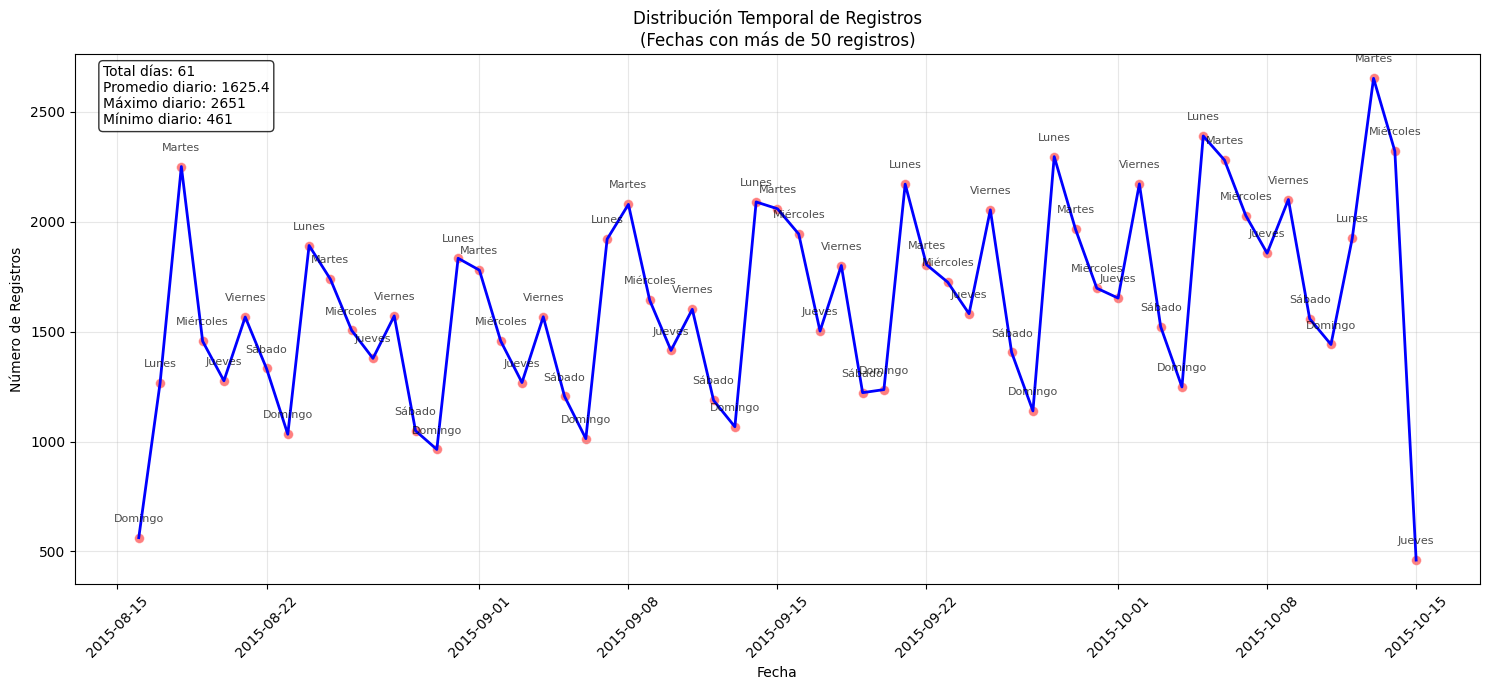

In [6]:
# Se checa que la fecha tenga sentido, para hacer esto se tuvieron que quitar valores que no se podian convertir a datetime y aquellas fechas que tenina menos de 50 registros
analyzer.plot_temporal_distribution(threshold=50)

In [7]:
# Se eliminan los registros que no tienen fecha y las fechas que tienen menos de 50 registros
analyzer.clean_dates_by_frequency()


2025-07-04 02:10:42,709 - INFO - Limpieza de fechas completada:
- Filas con fechas inválidas eliminadas: 8 (0.01% del total)
- Filas eliminadas por baja frecuencia: 842 (0.84% del total)
- Total de filas eliminadas: 850 (0.85% del total)
2025-07-04 02:10:42,759 - INFO - Fechas únicas restantes: 61
Promedio de registros por fecha: 1625.4


In [8]:
# Detectar outliers en precios sin descuento
outliers_mask, outliers = analyzer.detect_outliers(column='base_price', method='iqr')

2025-07-04 02:10:42,897 - INFO - Detectados 14089 outliers usando método iqr


In [9]:
# Detectar outliers en precios con descuento
outliers_mask, outliers = analyzer.detect_outliers(column='price', method='iqr')

2025-07-04 02:10:43,029 - INFO - Detectados 14090 outliers usando método iqr


In [10]:
# Detectar outliers en precios
outliers_mask, outliers = analyzer.detect_outliers(column='sold_quantity', method='iqr')

2025-07-04 02:10:51,205 - INFO - Detectados 16794 outliers usando método iqr


In [11]:
# Generar los histogramas
#analyzer.plot_numeric_histograms(figsize=(15, 7))

2025-07-04 02:11:21,631 - INFO - Generados 6 histogramas con transformación logarítmica


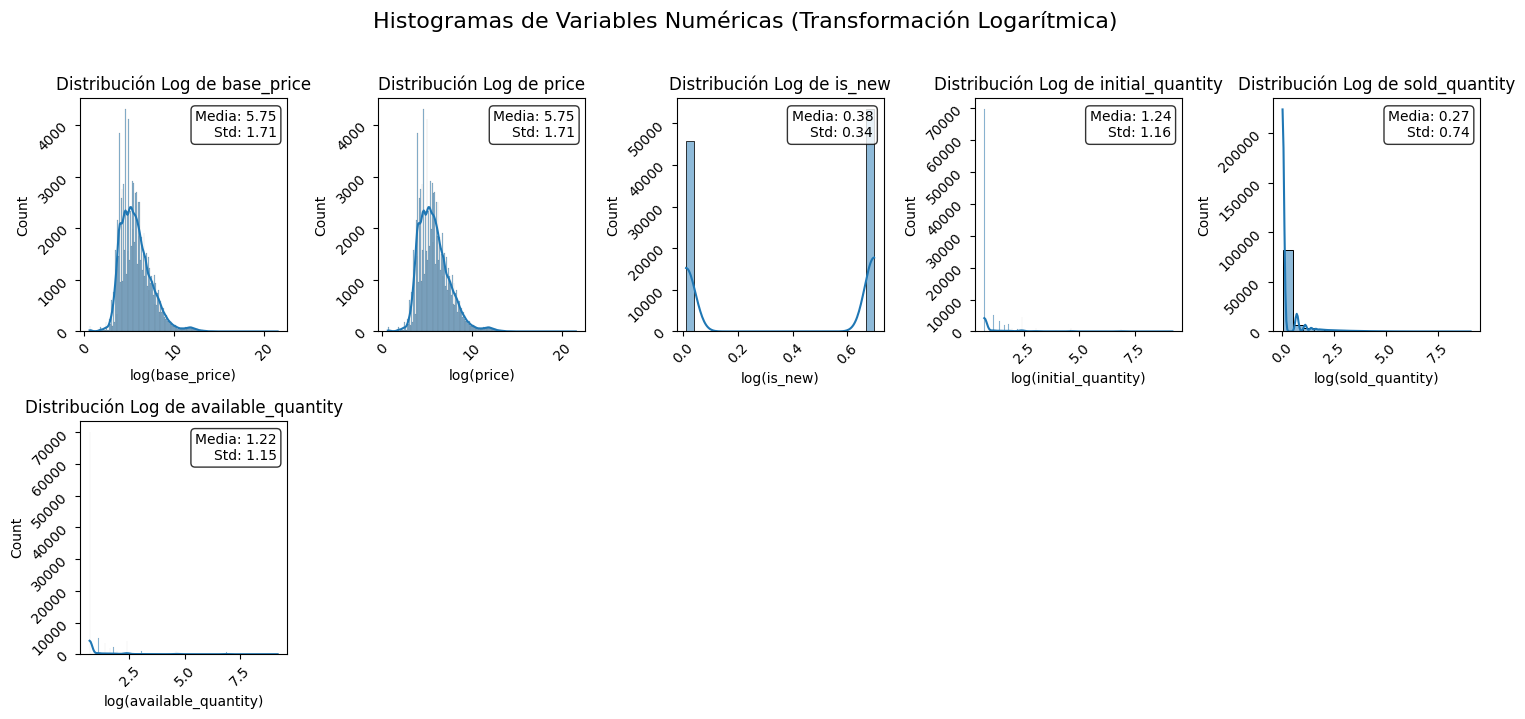

In [12]:
# Generar los histogramas con transformación logarítmica
analyzer.plot_log_transformed_histograms(figsize=(15, 7))


2025-07-04 02:11:44,497 - INFO - Generados 6 boxplots para las variables numéricas


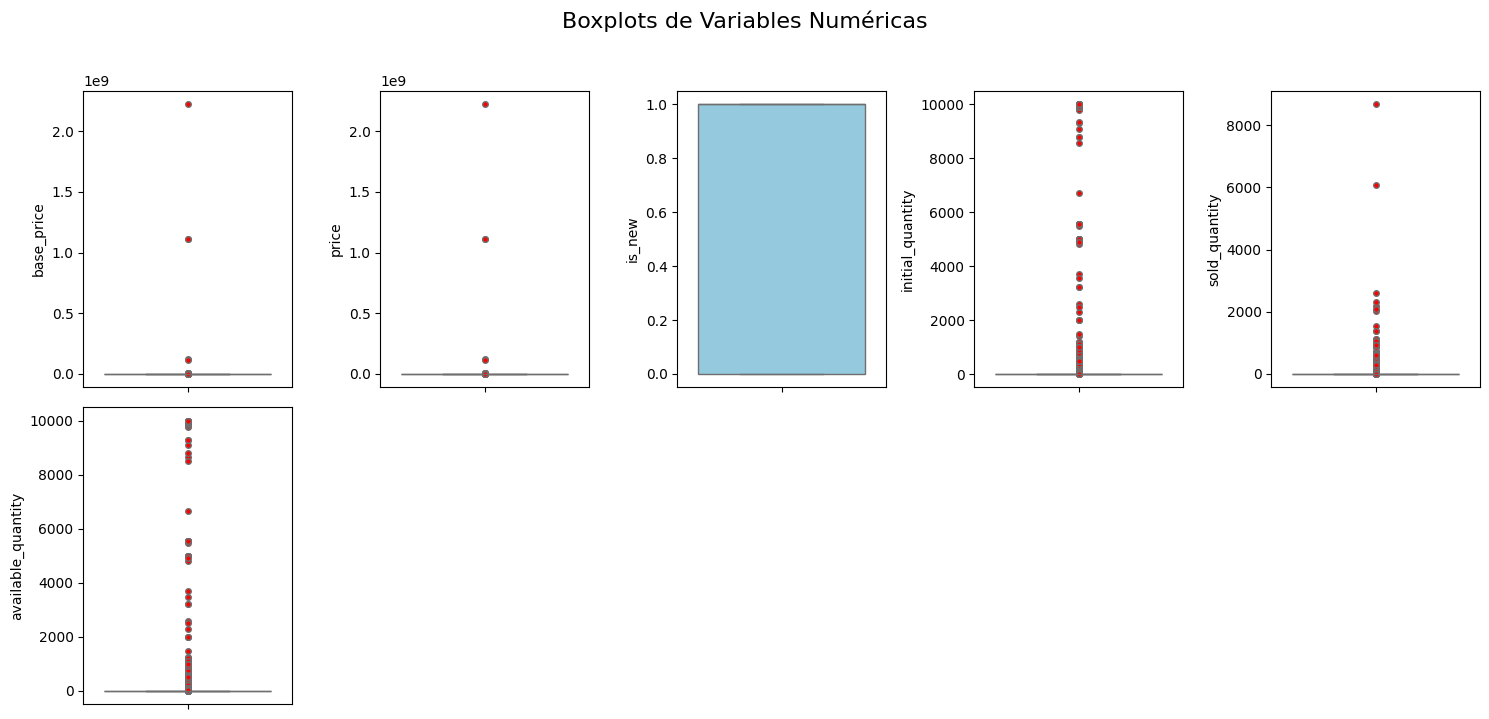

In [13]:
# Generar los boxplots
analyzer.plot_boxplots(figsize=(15, 7))

## 3. Limpieza de columnas


 En esta sección realizaremos la limpieza y preparación de las columnas del dataset:
 
 ### 3.1 Eliminación de outliers
 - Se detectaron outliers en las columnas numéricas usando el método IQR
 - Se eliminarán los outliers de la columna 'price' para mejorar la calidad del modelo
 - Los outliers pueden indicar productos con precios anómalos o errores de datos
 
 ### 3.2 Limpieza de datos categóricos
 - Se identificaron inconsistencias en columnas booleanas (shipping_admits_pickup, shipping_is_free)
 - Los valores tienen espacios extra que causan duplicación de categorías
 - Se aplicará limpieza de espacios en blanco para unificar las categorías
 
 ### 3.3 Análisis de valores únicos
 - Se realizará un análisis exhaustivo de todas las columnas categóricas
 - Esto ayudará a identificar patrones y posibles problemas de calidad de datos
 - Los resultados se usarán para decisiones de feature engineering posteriores


In [14]:
# Para este ejercicio quitaré los outliers de la columna price, pero aún vale la pena realizar un analísis sobre de ellos. 
analyzer.remove_outliers_by_iqr(columns=['price'])


2025-07-04 02:11:50,743 - INFO - Filas eliminadas por outliers: 14090 (14.21% del total)
2025-07-04 02:11:50,743 - INFO - Columna 'price': 14090 outliers detectados (14.21% del total)


2025-07-04 02:11:53,227 - INFO - Generados 6 boxplots para las variables numéricas


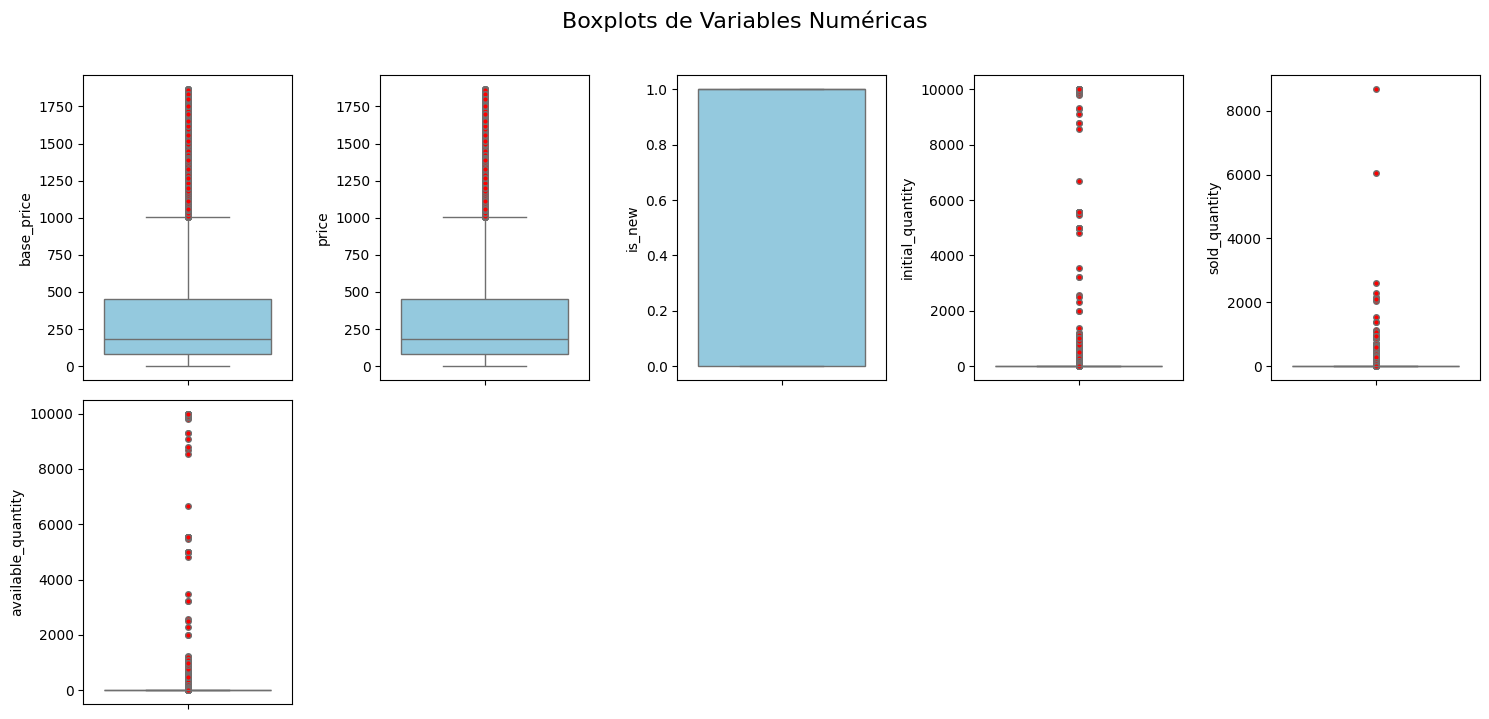

In [15]:
# Generar los boxplots
analyzer.plot_boxplots(figsize=(15, 7))

In [16]:
# Análisis rápdo de las columnas categóricas
categorical_values = analyzer.get_unique_categorical_values()

# Para ver los resultados
categorical_values.reset_index(drop=True).head(100)

2025-07-04 02:11:56,627 - INFO - Análisis de valores únicos completado para 19 columnas no numéricas


,columna,valores_unicos,cantidad_valores
0,seller_country,"[Argentina, unknown]",2
1,buying_mode,"[auction, buy_it_now, classified]",3
2,shipping_admits_pickup,"[False, False, True, True]",4
3,shipping_mode,"[custom, me1, me2, not_specified]",4
4,status,"[active, closed, not_yet_active, paused]",4
5,shipping_is_free,"[False, False, True, True]",4
6,seller_loyalty,"[bronze, free, gold, gold_premium, gold_pro, g...",7
7,tags,"[['dragged_bids_and_visits'], ['dragged_visits...",8
8,seller_province,"[Buenos Aires, Capital Federal, Catamarca, Cha...",25
9,attributes,"[[], [{'value_id': '', 'attribute_group_id': '...",967


In [17]:
# La columna shipping_admits_pickup false y true 2 veces, por un espacio de más
analyzer.data.shipping_admits_pickup.value_counts()

shipping_admits_pickup
True     45161
True     23813
False    10536
False     5550
Name: count, dtype: int64

In [18]:
# Esto mismo para el caso de shipping_is_free
analyzer.data.shipping_is_free.value_counts()

shipping_is_free
False    54400
False    28607
True      1297
True       756
Name: count, dtype: int64

In [19]:
# Se corrigen los espacios en blanco de las columnas categóricas de shipping_is_free y shipping_admits_pickup
analyzer.clean_string_whitespace(columns=['shipping_is_free', 'shipping_admits_pickup'])

2025-07-04 02:11:59,843 - INFO - Limpieza de espacios completada en 2 columnas:
2025-07-04 02:11:59,844 - INFO - Columna 'shipping_is_free':
- Valores únicos originales: 4
- Valores únicos después de limpieza: 2
- Valores unificados por espacios: 2
2025-07-04 02:11:59,845 - INFO - Columna 'shipping_admits_pickup':
- Valores únicos originales: 4
- Valores únicos después de limpieza: 2
- Valores unificados por espacios: 2


In [22]:
analyzer.remove_rows_with_high_missing(threshold=0.5)

2025-07-04 02:21:33,629 - INFO - Filas eliminadas por alto porcentaje de valores faltantes: 0 (0.00% del total). Threshold usado: 50.0%
2025-07-04 02:21:33,829 - INFO - Valores faltantes restantes: 0 NaN, 0 strings vacíos


In [24]:
analyzer.remove_rows_by_values(column_name='seller_country', values_to_remove=['unknown'])

2025-07-04 02:24:06,200 - INFO - Filas eliminadas: 2 (0.00% del total) basado en 1 valores en la columna 'seller_country'


In [25]:
# Análisis rápdo de las columnas categóricas
categorical_values = analyzer.get_unique_categorical_values()

# Para ver los resultados
categorical_values.reset_index(drop=True).head(100)

2025-07-04 02:24:16,457 - INFO - Análisis de valores únicos completado para 19 columnas no numéricas


,columna,valores_unicos,cantidad_valores
0,seller_country,[Argentina],1
1,shipping_admits_pickup,"[False, True]",2
2,shipping_is_free,"[False, True]",2
3,buying_mode,"[auction, buy_it_now, classified]",3
4,status,"[active, closed, not_yet_active, paused]",4
5,shipping_mode,"[custom, me1, me2, not_specified]",4
6,seller_loyalty,"[bronze, free, gold, gold_premium, gold_pro, g...",7
7,tags,"[['dragged_bids_and_visits'], ['dragged_visits...",8
8,seller_province,"[Buenos Aires, Capital Federal, Catamarca, Cha...",24
9,attributes,"[[], [{'value_id': '', 'attribute_group_id': '...",967


## 4. Se almacena el dataset procesado
 
 En esta sección se guarda el dataset que ha sido procesado y limpiado
 con todas las transformaciones aplicadas durante el análisis exploratorio.
 
 El dataset procesado incluye:
 - Datos sin outliers (eliminados usando método IQR)
 - Columnas categóricas limpias (espacios en blanco corregidos)
 - Fechas validadas y filtradas
 - Valores faltantes gestionados apropiadamente
 
 Este dataset limpio estará listo para más exploración y creación de nuevas features para los modelos de machine learning.


In [26]:
# Guardo el dataframe limpio
ruta = analyzer.save_processed_dataset(filename='new_items_dataset_procesado_v1')

2025-07-04 02:24:36,620 - INFO - Dataset guardado exitosamente:
- Archivo: c:\Users\Milara\Desktop\github\meli-challenge\data\processed\new_items_dataset_procesado_v1_20250704_022433.csv
- Filas: 85058
- Columnas: 25
- Tamaño en memoria: 167.33 MB
- Metadatos guardados en: c:\Users\Milara\Desktop\github\meli-challenge\data\processed\new_items_dataset_procesado_v1_20250704_022433_metadata.json


 ## Resumen Completo del Notebook EDA_to_clean.ipynb

 ### 1. Carga y Exploración Inicial del Dataset
 - Se cargó un dataset de 100,000 registros con 26 columnas desde `new_items_dataset.csv`
 - Se detectaron columnas con tipos mixtos (columnas 10, 17, 18) que requirieron configuración especial
 - El dataset contiene información de productos de MercadoLibre con campos como: id, title, price, category_id, seller_id, etc.

 ### 2. Análisis de Valores Faltantes
 - Se identificaron valores faltantes en múltiples columnas:
   * `sub_status`: 99,014 valores faltantes (99% del dataset)
   * `warranty`: 60,894 valores faltantes (61% del dataset)
   * `price`: 8 valores faltantes
   * `seller_city`: 8 valores faltantes
   * `seller_province` y `seller_country`: 7 valores faltantes cada una
 - Se eliminó la columna `sub_status` por tener demasiados valores faltantes (99%)

 ### 3. Limpieza de Fechas
 - Se analizó la distribución temporal de los datos
 - Se eliminaron 850 registros (0.85% del total) por:
   * Fechas inválidas: 8 registros
   * Baja frecuencia temporal: 842 registros
 - Quedaron 61 fechas únicas con un promedio de 1,625.4 registros por fecha

 ### 4. Detección y Eliminación de Outliers
 - Se detectaron outliers usando el método IQR en múltiples columnas numéricas:
   * `price`: 14,090 outliers (14.21% del total)
   * `base_price`: 14,090 outliers
   * `initial_quantity`: 16,794 outliers
 - Se eliminaron 14,090 registros por outliers en la columna `price`

 ### 5. Análisis de Distribuciones
 - Se generaron histogramas para 6 columnas numéricas
 - Se aplicó transformación logarítmica para mejor visualización
 - Se crearon boxplots antes y después de la limpieza de outliers

 ### 6. Análisis de Variables Categóricas
 - Se analizaron 19 columnas no numéricas
 - Se identificaron columnas con problemas de espacios en blanco:
   * `shipping_admits_pickup`: 4 valores únicos (debido a espacios)
   * `shipping_is_free`: 4 valores únicos (debido a espacios)
 - Se corrigieron los espacios en blanco, reduciendo a 2 valores únicos en cada caso

 ### 7. Resultados Finales
 - Dataset final: 85,060 registros (reducción del 14.9% desde los 100,000 originales)
 - 25 columnas (se eliminó `sub_status`)
 - Tamaño en memoria: 166.16 MB
 - Dataset guardado como `new_items_dataset_procesado_v1.csv`

 ### 8. Principales Transformaciones Aplicadas
 - Eliminación de columna con 99% de valores faltantes
 - Limpieza de fechas y filtrado por frecuencia temporal
 - Eliminación de outliers usando método IQR
 - Corrección de espacios en blanco en variables categóricas
 - Gestión apropiada de valores faltantes

 El dataset resultante está listo para análisis más avanzado y creación de features para modelos de machine learning.
